In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4eaf3d49499646cfa0dac58baf8acae7c4d9fcb98791afa4a107e050e3cbed87
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


300.00001142775153


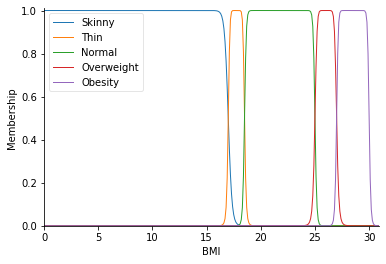

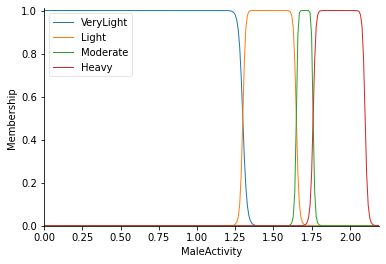

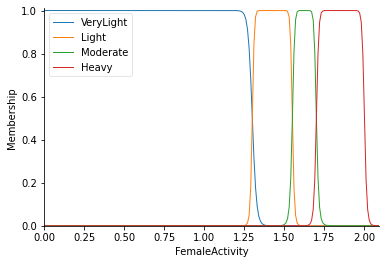

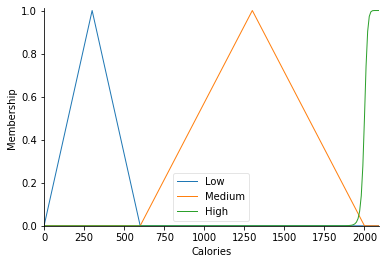

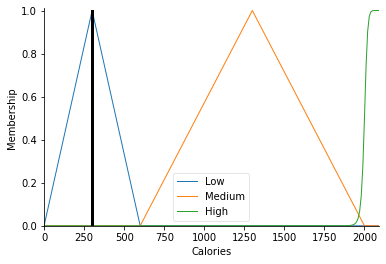

In [35]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random

bmi = ctrl.Antecedent(np.arange(0,31,0.1),'BMI')
maleactivity = ctrl.Antecedent(np.arange(0,2.2,0.01),'MaleActivity')
femaleactivity = ctrl.Antecedent(np.arange(0,2.1,0.01),'FemaleActivity')
calories = ctrl.Consequent(np.arange(0,2100,10),'Calories')

bmi['Skinny']=fuzz.gbellmf(bmi.universe,17,50,0)
bmi['Thin']=fuzz.gbellmf(bmi.universe,0.75,5,17.75)
bmi['Normal']=fuzz.gbellmf(bmi.universe,3.25,20,21.75)
bmi['Overweight']=fuzz.gbellmf(bmi.universe,1,5,26)
bmi['Obesity']=fuzz.gbellmf(bmi.universe,1.5,10,28.5)
bmi.view()

maleactivity['VeryLight']=fuzz.gbellmf(maleactivity.universe,1.3,50,0)
maleactivity['Light']=fuzz.gbellmf(maleactivity.universe,0.175,10,1.475)
maleactivity['Moderate']=fuzz.gbellmf(maleactivity.universe,0.055,5,1.705)
maleactivity['Heavy']=fuzz.gbellmf(maleactivity.universe,0.17,10,1.93)
maleactivity.view()

femaleactivity['VeryLight']=fuzz.gbellmf(femaleactivity.universe,1.3,50,0)
femaleactivity['Light']=fuzz.gbellmf(femaleactivity.universe,0.125,10,1.425)
femaleactivity['Moderate']=fuzz.gbellmf(femaleactivity.universe,0.075,5,1.625)
femaleactivity['Heavy']=fuzz.gbellmf(femaleactivity.universe,0.15,10,1.85)
femaleactivity.view()

calories['Low']=fuzz.trimf(calories.universe,[0,300,600])
calories['Medium']=fuzz.trimf(calories.universe,[600,1300,2000])
calories['High']=fuzz.gbellmf(calories.universe,100,5,2100)
calories.view()

rule1 = ctrl.Rule((bmi['Skinny']|bmi['Thin'])&(maleactivity['VeryLight']|femaleactivity['VeryLight']|maleactivity['Light']|femaleactivity['Light']|maleactivity['Moderate']|femaleactivity['Moderate']|maleactivity['Heavy']|femaleactivity['Heavy']),calories['High'])
rule2 = ctrl.Rule(bmi['Normal']&(maleactivity['VeryLight']|femaleactivity['VeryLight']|maleactivity['Light']|femaleactivity['Light']|maleactivity['Moderate']|femaleactivity['Moderate']|maleactivity['Heavy']|femaleactivity['Heavy']),calories['Medium'])
rule3 = ctrl.Rule((bmi['Overweight']|bmi['Obesity'])&(maleactivity['VeryLight']|femaleactivity['VeryLight']|maleactivity['Light']|femaleactivity['Light']|maleactivity['Moderate']|femaleactivity['Moderate']|maleactivity['Heavy']|femaleactivity['Heavy']),calories['Low'])

computing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
computing = ctrl.ControlSystemSimulation(computing_ctrl)
computing.input['BMI'] = random.randint(0,32)
computing.input['MaleActivity'] = (random.randint(0,22))/10
computing.input['FemaleActivity'] = (random.randint(0,21))/10
computing.compute()
print(computing.output['Calories'])
calories.view(sim=computing)